In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #or any model of your choice
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Loading Dataset

In [2]:
train = pd.read_csv("train.csv")

train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
test = pd.read_csv("test.csv")

test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [4]:
sample_sub = pd.read_csv("sample_submission.csv")

sample_sub.head()

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016


In [5]:
len(train)

188533

In [6]:
len(test)

125690

In [7]:
len(sample_sub)

125690

In [8]:
df = pd.concat([train, test], ignore_index=True)

In [9]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0


In [10]:
df.isnull().sum()

id                   0
brand                0
model                0
model_year           0
milage               0
fuel_type         8466
engine               0
transmission         0
ext_col              0
int_col              0
accident          4084
clean_title      35658
price           125690
dtype: int64

In [11]:
df['fuel_type'].fillna('Unknown', inplace=True)

C:\Users\SKYTECH\AppData\Local\Temp\ipykernel_8580\3468025397.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna('Unknown', inplace=True)


In [12]:
df['accident'].fillna('At least 1 accident or damage reported', inplace=True)

C:\Users\SKYTECH\AppData\Local\Temp\ipykernel_8580\2875287466.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['accident'].fillna('At least 1 accident or damage reported', inplace=True)


In [13]:
df['clean_title'].fillna('Unknown', inplace=True)

C:\Users\SKYTECH\AppData\Local\Temp\ipykernel_8580\2178307886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_title'].fillna('Unknown', inplace=True)


In [14]:
df['price'].mean()

np.float64(43878.01617753921)

In [15]:
med = df['price'].median()
med

30825.0

In [16]:
df['price'].max()

2954083.0

In [17]:
df['price'].min()

2000.0

In [18]:
# Filling the missing value with media
df['price'] = df['price'].fillna(med)

In [19]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [20]:
len(df)

314223

In [21]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [22]:
df['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [23]:
df['brand'].value_counts()

brand
Ford             38353
Mercedes-Benz    32047
BMW              28314
Chevrolet        27033
Audi             18176
Porsche          17765
Land             15873
Toyota           14934
Lexus            14372
Jeep             10886
Cadillac          7733
RAM               7002
Nissan            6604
Tesla             6125
INFINITI          5399
GMC               5309
Dodge             5204
Mazda             4489
Kia               4247
Lincoln           4016
Subaru            3972
Acura             3849
Honda             3537
Hyundai           3353
Volkswagen        2987
Jaguar            2253
Bentley           1944
MINI              1761
Genesis           1612
Buick             1591
Maserati          1558
Lamborghini       1356
Volvo             1299
Chrysler          1241
Alfa              1149
Rivian             980
Rolls-Royce        944
Mitsubishi         918
Pontiac            879
Hummer             862
Ferrari            610
McLaren            408
Aston              382
Satur

In [24]:
df['model'].unique()

array(['Cooper S Base', 'LS V8', 'Silverado 2500 LT', ...,
       'Integra w/A-Spec Tech Package', 'IONIQ Plug-In Hybrid SEL',
       'allroad 2.7T'], dtype=object)

In [25]:
df['model'].value_counts()

model
F-150 XLT                   4868
M3 Base                     3641
Camaro 2SS                  2820
M4 Base                     2627
Mustang GT Premium          2464
                            ... 
X5 xDrive40e                   2
V60 T6 R-Design Platinum       2
Forte LX                       2
X5 3.0i                        1
allroad 2.7T                   1
Name: count, Length: 1898, dtype: int64

In [26]:
df['model'].value_counts().head(20)

model
F-150 XLT                      4868
M3 Base                        3641
Camaro 2SS                     2820
M4 Base                        2627
Mustang GT Premium             2464
F-150 Lariat                   2304
E-Class E 350 4MATIC           2239
1500 Laramie                   2006
911 Carrera S                  2004
Corvette Base                  1949
GX 460 Base                    1912
E-Class E 350                  1896
911 Carrera                    1866
Corvette Stingray w/2LT        1827
Explorer XLT                   1797
Rover Range Rover Sport HSE    1778
Wrangler Sport                 1661
AMG G 63 Base                  1640
F-250 XLT                      1419
F-250 Lariat                   1413
Name: count, dtype: int64

In [27]:
df['model_year'].unique()

array([2007, 2002, 2017, 2021, 2018, 2016, 2020, 2015, 2011, 2013, 2023,
       2019, 2012, 2014, 2008, 2009, 2022, 2003, 2005, 2001, 2006, 2000,
       2010, 2004, 1997, 1998, 1999, 1994, 1993, 1996, 1995, 2024, 1974,
       1992, 1982, 1988])

In [28]:
df['model_year'].value_counts()

model_year
2021    30234
2018    27559
2020    26565
2022    26163
2019    25393
2016    22758
2017    21208
2015    18925
2023    14552
2014    13964
2013    11465
2011    10497
2012    10310
2008     8534
2007     8224
2010     7038
2005     5234
2006     4722
2009     4595
2004     4183
2003     3175
2001     2583
2002     2162
1999      952
2000      911
1998      590
1997      526
1996      309
2024      277
1993      228
1994      175
1995      171
1992       21
1974       18
1982        1
1988        1
Name: count, dtype: int64

In [29]:
df['milage'].unique()

array([213000, 143250, 136731, ...,   2699,  95401,  21436])

In [30]:
df['milage'].value_counts()

milage
60000     2182
170000    2165
120000    1920
110000    1918
130000    1634
          ... 
24129        1
24961        1
20470        1
38598        1
167856       1
Name: count, Length: 8440, dtype: int64

In [31]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Unknown', 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [32]:

df['fuel_type'].value_counts()

fuel_type
Gasoline          276473
Hybrid             11508
E85 Flex Fuel       8929
Unknown             8466
Diesel              6641
–                   1319
Plug-In Hybrid       858
not supported         29
Name: count, dtype: int64

In [33]:
df['engine'].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas',
       '177.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [34]:
df['engine'].value_counts()

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           5651
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           4868
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           4694
2.0L I4 16V GDI DOHC Turbo                             4513
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          4090
                                                       ... 
70.0HP 1.0L 3 Cylinder Engine Gasoline Fuel               3
111.0HP Electric Motor Electric Fuel System               3
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       3
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               2
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1118, dtype: int64

In [35]:
df['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [36]:
df['transmission'].value_counts()

transmission
A/T                                                   83036
8-Speed A/T                                           34586
Transmission w/Dual Shift Mode                        32079
6-Speed A/T                                           30105
6-Speed M/T                                           19863
7-Speed A/T                                           18498
Automatic                                             17866
8-Speed Automatic                                     13977
10-Speed A/T                                          13347
9-Speed A/T                                            6450
5-Speed A/T                                            5458
10-Speed Automatic                                     5268
6-Speed Automatic                                      4690
4-Speed A/T                                            4212
5-Speed M/T                                            4048
9-Speed Automatic                                      3878
CVT Transmission           

In [37]:
df['ext_col'].unique()

array(['Yellow', 'Silver', 'Blue', 'Black', 'White',
       'Snowflake White Pearl Metallic', 'Gray', 'Green',
       'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic',
       'Red', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue',
       'Beige', 'Gold', 'Platinum White Pearl', 'Metallic',
       'White Frost Tri-Coat', 'Firecracker Red Clearcoat',
       'Phytonic Blue Metallic', 'Blu', 'Orange', 'Brown',
       'Brilliant Silver Metallic', 'Black Raven', 'Black Clearcoat',
       'Firenze Red', 'Agate Black Metallic', 'Glacial White Pearl',
       'Majestic Plum Metallic', 'designo Diamond White Metallic',
       'Oxford White', 'Black Sapphire Metallic', 'Mythos Black',
       'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat',
       'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic',
       'designo Diamond White Bright',
       'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl',
       'Deep Crystal Blue Mica', 'Flame Red

In [38]:
df['ext_col'].value_counts().head(60)

ext_col
Black                                      81028
White                                      73040
Gray                                       42193
Silver                                     28343
Blue                                       24272
Red                                        16548
Green                                       4556
Gold                                        2838
Brown                                       1920
Orange                                      1896
Beige                                       1820
Yellow                                      1603
Bright White Clearcoat                      1263
Diamond Black                               1170
Agate Black Metallic                        1056
Summit White                                 852
Silver Ice Metallic                          738
Mythos Black Metallic                        697
Midnight Black Metallic                      641
Granite Crystal Clearcoat Metallic           602
–           

In [39]:
df['ext_col'].value_counts().tail(60)

ext_col
Redline Red                           27
Moonlight Cloud                       27
Wolf Gray                             27
Mineral White                         26
Ruby Red Metallic Tinted Clearcoat    26
Super Black                           26
Oryx White Prl                        26
Pacific Blue                          26
Caspian Blue                          26
Go Mango!                             25
Anodized Blue Metallic                25
Platinum Gray Metallic                25
Yulong                                23
Gecko Pearlcoat                       23
Arancio Borealis                      23
Nightfall Mica                        23
Midnight Blue Metallic                23
Carpathian Grey                       23
Reflex Silver                         23
Dark Sapphire                         22
Grigio Nimbus                         21
Apex Blue                             21
Pristine White                        20
Passion Red                           20
Cobra Be

In [40]:
df['int_col'].unique()

array(['Gray', 'Beige', 'Black', '–', 'Blue', 'White', 'Red', 'Brown',
       'Dark Galvanized', 'Parchment.', 'Boulder', 'Orange',
       'Medium Earth Gray', 'Ebony', 'Canberra Beige', 'Jet Black',
       'Silver', 'Light Platinum / Jet Black', 'Macchiato/Magmagrey',
       'Gold', 'Cloud', 'Rioja Red', 'Global Black', 'Green',
       'Medium Stone', 'Navy Pier', 'Dark Ash', 'BLACK', 'Portland',
       'Sandstone', 'Canberra Beige/Black', 'Diesel Gray / Black',
       'Sarder Brown', 'Black Onyx', 'White / Brown', 'Black/Gun Metal',
       'Slate', 'Satin Black', 'Macchiato Beige/Black', 'Charcoal',
       'Black / Express Red', 'Cappuccino', 'Aragon Brown', 'Parchment',
       'Oyster W/Contrast', 'Adrenaline Red', 'Ebony.', 'Shara Beige',
       'Graystone', 'Pearl Beige', 'Nero Ade', 'Graphite',
       'Tan/Ebony/Ebony', 'Charcoal Black', 'Medium Ash Gray',
       'Ebony Black', 'Light Titanium', 'Sakhir Orange', 'Tan',
       'Rock Gray', 'Brandy', 'Carbon Black', 'Amber',
      

In [41]:
df['int_col'].value_counts()

int_col
Black           179287
Beige            40990
Gray             35381
Brown             9721
Red               8641
                 ...  
Classic Red         14
Carbon Black        12
Bianco Polar        11
Cobalt Blue          9
ORANGE               6
Name: count, Length: 156, dtype: int64

In [42]:
df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [43]:
df['accident'].value_counts()

accident
None reported                             240777
At least 1 accident or damage reported     73446
Name: count, dtype: int64

In [44]:
df['clean_title'].unique()

array(['Yes', 'Unknown'], dtype=object)

In [45]:
df['clean_title'].value_counts()

clean_title
Yes        278565
Unknown     35658
Name: count, dtype: int64

In [46]:
df['price'].unique()

array([ 4200.,  4999., 13900., ..., 33498., 81998., 13310.])

In [47]:
df['price'].value_counts()

price
30825.0     125738
15000.0       1920
12000.0       1459
30000.0       1280
29000.0       1228
             ...  
239991.0        22
269991.0        22
259991.0        21
107998.0        20
45998.0         19
Name: count, Length: 1569, dtype: int64

# Exploratory Data Analysis

In [48]:
def plots(columns,ncols_for_subplot, df):
    ncols = ncols_for_subplot
    nrows = -(-len(columns) // ncols)  # ceiling division

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.scatterplot(x=col, y='price', data=df, ax=axes[i])
        axes[i].set_title(f'Price vs. {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Price')

    # hide unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [49]:
categorical_cols = train.select_dtypes(include='object').columns
numerical_cols = train.select_dtypes(exclude='object').columns
def exploratory_data_analysis(df):
    '''This function performs some preliminary EDA. You are free to add more to it to 
       guide you in preparing your dataset for trainiing
    '''
    print("First 5 rows of the dataset:")
    print(df.head())
    
    # Get information about the dataset (data types, non-null values)
    print("\nDataset information:")
    df.info()
    
    # Get descriptive statistics for numerical columns
    print("\nDescriptive statistics for numerical columns:")
    print(df.describe())
    #Get descriptive statistics for categorical columns
    print("\nDescriptive statistics for categorical columns:")
    print(df.describe(include='object'))
    #Checking for missing values
    print("\nMissing values per column:")
    print(df.isnull().sum())
    # Visualize the distribution of the target variable (price)
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price'], kde=True, bins=50)
    plt.title('Distribution of Car Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()
    
    
    # Visualizing the relationship between all numerical features and price
    # For example, 'mileage' and 'price'
    print('Plotting numerical variables vs price')
    numerical_plot=plots(numerical_cols,2,df)
   

First 5 rows of the dataset:
   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2     

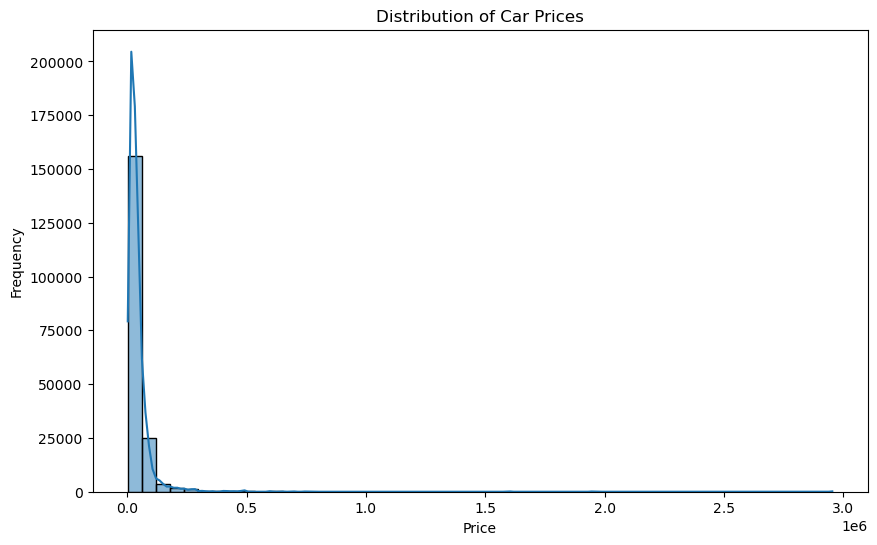

Plotting numerical variables vs price


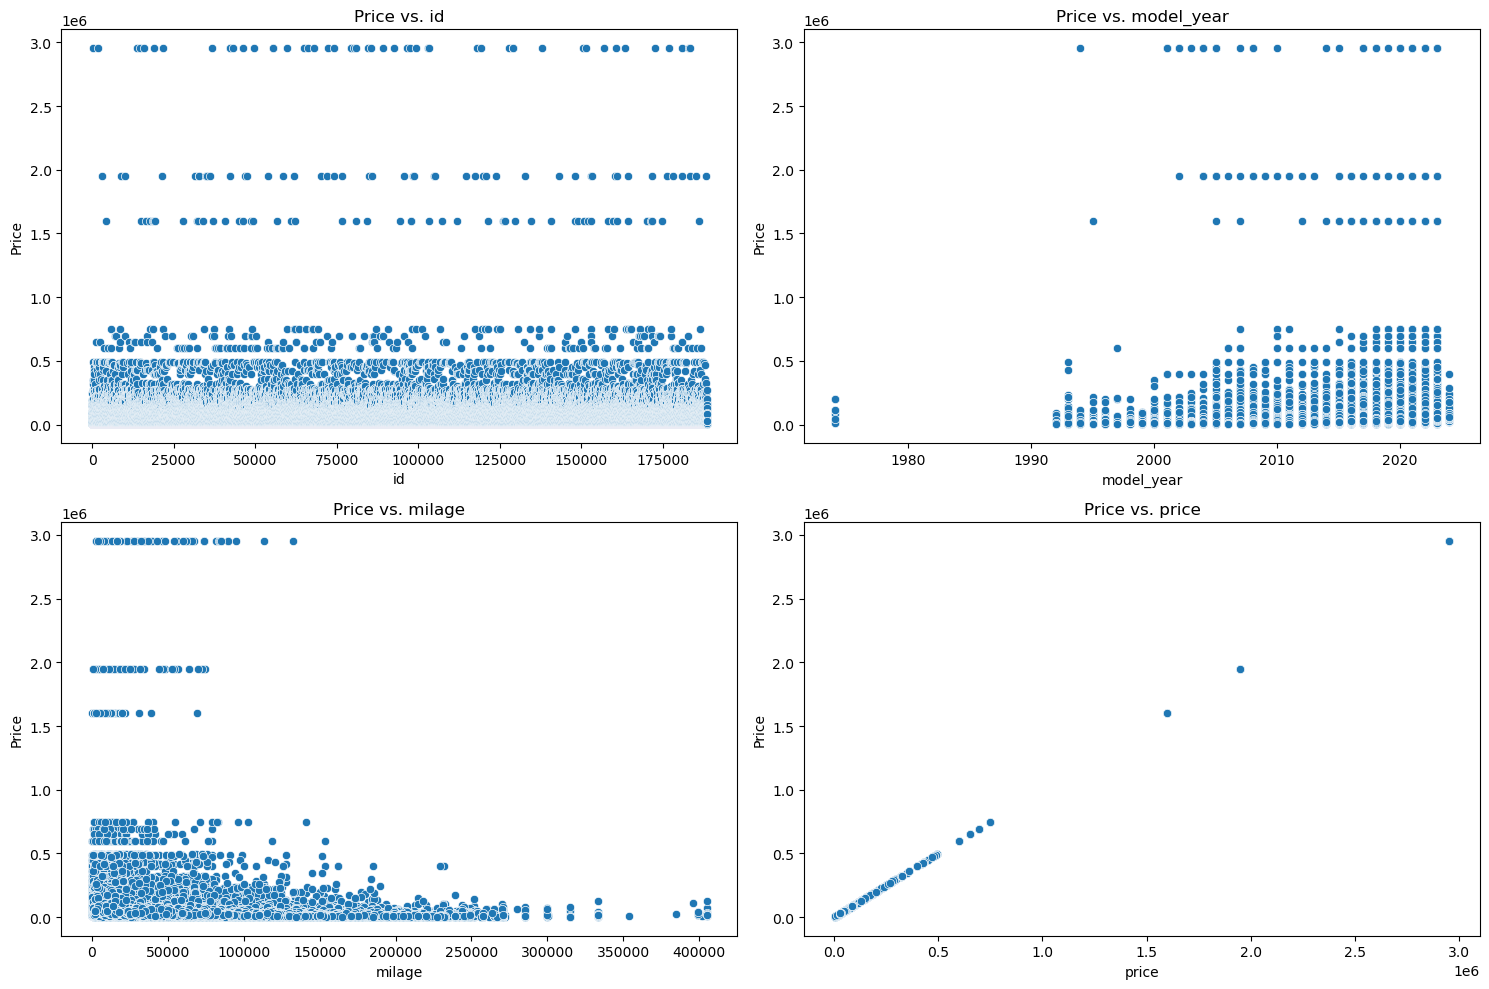

In [50]:
exploratory_data_analysis(train)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314223 entries, 0 to 314222
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            314223 non-null  int64  
 1   brand         314223 non-null  object 
 2   model         314223 non-null  object 
 3   model_year    314223 non-null  int64  
 4   milage        314223 non-null  int64  
 5   fuel_type     314223 non-null  object 
 6   engine        314223 non-null  object 
 7   transmission  314223 non-null  object 
 8   ext_col       314223 non-null  object 
 9   int_col       314223 non-null  object 
 10  accident      314223 non-null  object 
 11  clean_title   314223 non-null  object 
 12  price         314223 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 31.2+ MB


In [52]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [54]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [55]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [56]:
df['brand'].value_counts()

brand
Ford             38353
Mercedes-Benz    32047
BMW              28314
Chevrolet        27033
Audi             18176
Porsche          17765
Land             15873
Toyota           14934
Lexus            14372
Jeep             10886
Cadillac          7733
RAM               7002
Nissan            6604
Tesla             6125
INFINITI          5399
GMC               5309
Dodge             5204
Mazda             4489
Kia               4247
Lincoln           4016
Subaru            3972
Acura             3849
Honda             3537
Hyundai           3353
Volkswagen        2987
Jaguar            2253
Bentley           1944
MINI              1761
Genesis           1612
Buick             1591
Maserati          1558
Lamborghini       1356
Volvo             1299
Chrysler          1241
Alfa              1149
Rivian             980
Rolls-Royce        944
Mitsubishi         918
Pontiac            879
Hummer             862
Ferrari            610
McLaren            408
Aston              382
Satur

In [57]:
brand_catmapping = {'Ford':0,           
'Mercedes-Benz':1,   
'BMW':2,
'Chevrolet':3,
'Audi':4,
'Porsche':5,     
'Land':6,          
'Toyota':7,         
'Lexus':8,          
'Jeep':9,          
'Cadillac':10,         
'RAM':11,    
'Nissan':12,       
'Tesla':13,
'INFINITI':14,
'GMC':15,
'Dodge':15,
'Mazda':15,
'Kia':15,
'Lincoln':15,
'Subaru':16,         
'Acura':16,
'Honda':16,
'Hyundai':16,
'Volkswagen':16,      
'Jaguar':17,
'Bentley':17,   
'MINI':17,          
'Genesis':17,
'Buick':17,
'Maserati':17,
'Lamborghini':17,      
'Volvo':17,        
'Chrysler':17,
'Alfa':17,      
'Rivian':18,
'Rolls-Royce':18,    
'Mitsubishi':18,
'Pontiac':18,
'Hummer': 18,
'Ferrari':18,
'McLaren':18,
'Aston':18,
'Saturn':18,
'Scion':18,
'Lucid':18,
'Mercury':18,
'FIAT':18,
'Lotus':18,
'Saab':18,
'Karma':18,      
'Plymouth':18,
'Suzuki':18,
'Maybach':18,
'Bugatti':18,
'Polestar':18,
'smart':18 }

In [58]:
df['brand'] = df['brand'].map(brand_catmapping)

In [59]:
df['brand'].value_counts()

brand
0     38353
1     32047
2     28314
3     27033
15    23265
4     18176
5     17765
16    17698
6     15873
17    15764
7     14934
8     14372
9     10886
10     7733
11     7002
18     6880
12     6604
13     6125
14     5399
Name: count, dtype: int64

In [60]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          276473
Hybrid             11508
E85 Flex Fuel       8929
Unknown             8466
Diesel              6641
–                   1319
Plug-In Hybrid       858
not supported         29
Name: count, dtype: int64

In [61]:
fuel_mapp = {'Gasoline': 0,
              'Hybrid': 1,  
            'E85 Flex Fuel':2, 
            'Unknown':3,             
            'Diesel' : 4,
            '–' :     5,
            'Plug-In Hybrid' : 5,
            'not supported' :  5 }

In [62]:
df['fuel_type'] = df['fuel_type'].map(fuel_mapp)

In [63]:
df['fuel_type'].value_counts()

fuel_type
0    276473
1     11508
2      8929
3      8466
4      6641
5      2206
Name: count, dtype: int64

In [64]:
len(df['fuel_type'])

314223

In [65]:
df['transmission'].value_counts()

transmission
A/T                                                   83036
8-Speed A/T                                           34586
Transmission w/Dual Shift Mode                        32079
6-Speed A/T                                           30105
6-Speed M/T                                           19863
7-Speed A/T                                           18498
Automatic                                             17866
8-Speed Automatic                                     13977
10-Speed A/T                                          13347
9-Speed A/T                                            6450
5-Speed A/T                                            5458
10-Speed Automatic                                     5268
6-Speed Automatic                                      4690
4-Speed A/T                                            4212
5-Speed M/T                                            4048
9-Speed Automatic                                      3878
CVT Transmission           

In [66]:
transmission_map = {'A/T':0,                                                   
'8-Speed A/T':1,                                           
'Transmission w/Dual Shift Mode':2,                        
'6-Speed A/T':3,                                         
'6-Speed M/T':4,                                           
'7-Speed A/T':5,                                           
'Automatic':6,                                             
'8-Speed Automatic':7,                                     
'10-Speed A/T':8,                                          
'9-Speed A/T':9,                                           
'5-Speed A/T':10,                                            
'10-Speed Automatic':11,                                     
'6-Speed Automatic':12,                                    
'4-Speed A/T':13,                                            
'5-Speed M/T':14,                                            
'9-Speed Automatic':15,                                     
'CVT Transmission':16,                                       
'1-Speed A/T':17,                                            
'7-Speed Automatic with Auto-Shift':18,                      
'M/T':19,                                                    
'Automatic CVT':20,                                          
'8-Speed Automatic with Auto-Shift':20,                     
'7-Speed M/T':20,                                             
'1-Speed Automatic':20,                                       
'6-Speed Manual':20,                                         
'7-Speed Automatic':20,                                       
'5-Speed Automatic':20,                                      
'Transmission Overdrive Switch':20,                          
'7-Speed Manual':20,                                          
'6-Speed Automatic with Auto-Shift':20,                       
'2':20,                                                      
'–':20,                                                       
'Variable':20,                                                
'2-Speed A/T':20,                                            
'F':20,                                                      
'4-Speed Automatic':20,                                        
'10-Speed Automatic with Overdrive':20,                        
'6 Speed Mt':20,                                               
'9-Speed Automatic with Auto-Shift':20,                        
'6-Speed Electronically Controlled Automatic with O':20,  
'8-Speed Manual':20,                                           
'7-Speed':20,                                                  
'Manual':20,                                                   
'6-Speed':20,                                                  
'2-Speed Automatic':20,                                        
'6 Speed At/Mt': 20,                                            
'7-Speed DCT Automatic':20,                                    
'Single-Speed Fixed Gear':20,                                  
'CVT-F':20,                                                    
'8-SPEED AT':20,                                               
'8-SPEED A/T':20,                                              
'SCHEDULED FOR OR IN PRODUCTION':20 }

In [67]:
df['transmission'] = df['transmission'].map(transmission_map)

In [68]:
df['transmission'].value_counts()

transmission
0     83036
1     34586
2     32079
3     30105
4     19863
5     18498
6     17866
7     13977
8     13347
20     6483
9      6450
10     5458
11     5268
12     4690
13     4212
14     4048
15     3878
16     3327
17     3160
18     1972
19     1920
Name: count, dtype: int64

In [69]:
df['accident'].value_counts()

accident
None reported                             240777
At least 1 accident or damage reported     73446
Name: count, dtype: int64

In [70]:
accident_map = {'None reported':0,                             
'At least 1 accident or damage reported':1}

In [71]:
df['accident'] = df['accident'].map(accident_map)

In [72]:
df['accident'].value_counts()

accident
0    240777
1     73446
Name: count, dtype: int64

In [73]:
df['clean_title'].value_counts()

clean_title
Yes        278565
Unknown     35658
Name: count, dtype: int64

In [74]:
clean_map = {
    'Yes':0,        
    'Unknown':1
}

In [75]:
df['clean_title'] = df['clean_title'].map(clean_map)

In [76]:
df['clean_title'].value_counts()

clean_title
0    278565
1     35658
Name: count, dtype: int64

In [77]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,17,Cooper S Base,2007,213000,0,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,0,Yellow,Gray,0,0,4200.0
1,1,15,LS V8,2002,143250,0,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,0,Silver,Beige,1,0,4999.0
2,2,3,Silverado 2500 LT,2002,136731,2,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,0,Blue,Gray,0,0,13900.0
3,3,17,G90 5.0 Ultimate,2017,19500,0,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,2,Black,Black,0,0,45000.0
4,4,1,Metris Base,2021,7388,0,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,5,Black,Beige,0,0,97500.0


In [78]:
ext_col_map = {'Black':0,                                
                'White':1,                                 
                'Gray':2,                                  
                'Silver':3,                                
                'Blue':4,                                  
                'Red':5,                                   
                'Green':6,                                  
                'Gold':7,                                   
                'Brown':8,                                  
                'Orange':9,                                 
                'Beige':9,                                  
                'Yellow':9,                                 
                'Bright White Clearcoat':9,                 
                'Diamond Black':9,                          
                'Agate Black Metallic':9,                  
                'Summit White':9,                            
                'Silver Ice Metallic':9,
                'Mythos Black Metallic':9,                   
                 'Midnight Black Metallic':9,               
                'Granite Crystal Clearcoat Metallic':9}     


In [79]:
df['ext_col'].value_counts()

ext_col
Black                                 81028
White                                 73040
Gray                                  42193
Silver                                28343
Blue                                  24272
                                      ...  
Granite Crystal Metallic Clearcoat        8
BLUE                                      7
Nautical Blue Pearl                       7
Mango Tango Pearlcoat                     5
GT SILVER                                 5
Name: count, Length: 319, dtype: int64

In [80]:
df['ext_col'] = df['ext_col'].map(ext_col_map)

In [81]:
df['ext_col'].value_counts()

ext_col
0.0    81028
1.0    73040
2.0    42193
3.0    28343
4.0    24272
5.0    16548
9.0    12338
6.0     4556
7.0     2838
8.0     1920
Name: count, dtype: int64

In [82]:
df['ext_col'] = df['ext_col'].fillna(8)

In [83]:
df['ext_col'].value_counts()

ext_col
0.0    81028
1.0    73040
2.0    42193
8.0    29067
3.0    28343
4.0    24272
5.0    16548
9.0    12338
6.0     4556
7.0     2838
Name: count, dtype: int64

In [84]:
df['int_col'].value_counts().head(20)

int_col
Black                  179287
Beige                   40990
Gray                    35381
Brown                    9721
Red                      8641
White                    7865
–                        7480
Jet Black                4008
Ebony                    3039
Orange                   1565
Blue                     1215
Global Black             1070
Silver                    735
Nero Ade                  659
Gold                      567
Black / Express Red       544
Graphite                  410
Rioja Red                 397
Black Onyx                394
Diesel Gray / Black       391
Name: count, dtype: int64

In [85]:
int_col_map = {'Black':0, 
                'Beige':1,                   
                'Gray':2,                    
                'Brown':3,                    
                'Red':4,                      
                'White':5,                    
                '–':6,                       
                'Jet Black':7,                
                'Ebony':8,                    
                'Orange':9,                   
                'Blue':9,                     
                'Global Black':9,             
                'Silver':9,                     
                'Nero Ade':9,      
                'Gold':9,                      
                'Black / Express Red':9,       
                'Graphite':9,                  
                'Rioja Red':9,                 
                'Black Onyx':9,                
                'Diesel Gray / Black':9 }

In [86]:
df['int_col'] = df['int_col'].map(int_col_map)

In [87]:
df['int_col'].value_counts()

int_col
0.0    179287
1.0     40990
2.0     35381
3.0      9721
4.0      8641
9.0      7947
5.0      7865
6.0      7480
7.0      4008
8.0      3039
Name: count, dtype: int64

In [88]:
df['int_col'] = df['int_col'].fillna(8)

In [89]:
df['model'].value_counts().head(20)

model
F-150 XLT                      4868
M3 Base                        3641
Camaro 2SS                     2820
M4 Base                        2627
Mustang GT Premium             2464
F-150 Lariat                   2304
E-Class E 350 4MATIC           2239
1500 Laramie                   2006
911 Carrera S                  2004
Corvette Base                  1949
GX 460 Base                    1912
E-Class E 350                  1896
911 Carrera                    1866
Corvette Stingray w/2LT        1827
Explorer XLT                   1797
Rover Range Rover Sport HSE    1778
Wrangler Sport                 1661
AMG G 63 Base                  1640
F-250 XLT                      1419
F-250 Lariat                   1413
Name: count, dtype: int64

In [90]:
model_map = {'F-150 XLT':0,                      
              'M3 Base':1,                        
             'Camaro 2SS':2,                     
             'M4 Base':3,                        
            'Mustang GT Premium':4,             
            'F-150 Lariat':5,                   
            'E-Class E 350 4MATIC':6,          
            '1500 Laramie':7,                   
            '911 Carrera S':8,                  
            'Corvette Base':9,                  
            'GX 460 Base':9,                    
            'E-Class E 350':9,                  
            '911 Carrera':9,                    
            'Corvette Stingray w/2LT':9,        
            'Explorer XLT':9,                  
            'Rover Range Rover Sport HSE':9,    
            'Wrangler Sport':9,               
            'AMG G 63 Base':9,                  
            'F-250 XLT':9,                     
            'F-250 Lariat':9}                  

In [91]:
df['model'] = df['model'].map(model_map)

In [92]:
df['model'].value_counts()

model
9.0    19158
0.0     4868
1.0     3641
2.0     2820
3.0     2627
4.0     2464
5.0     2304
6.0     2239
7.0     2006
8.0     2004
Name: count, dtype: int64

In [93]:
df['model'] = df['model'].fillna(8)

In [94]:
df['model'].value_counts()

model
8.0    272096
9.0     19158
0.0      4868
1.0      3641
2.0      2820
3.0      2627
4.0      2464
5.0      2304
6.0      2239
7.0      2006
Name: count, dtype: int64

In [95]:
df['engine'].value_counts().head(20)

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             5651
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             4868
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             4694
2.0L I4 16V GDI DOHC Turbo                               4513
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            4090
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel            4001
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             3689
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             3539
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    3453
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    3451
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel            3216
295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            3167
302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            3167
3.5L V6 24V PDI DOHC Twin Turbo                          3100
301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel             2655
3.6L V6 24V MPFI DOHC                                    2523
5

In [96]:
engine_map = {'355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel':0,             
             '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel':1,             
            '420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel':2,            
            '2.0L I4 16V GDI DOHC Turbo':3,                               
            '375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel':4,           
            '340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel':5,           
            '490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel':6,           
            '455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel':7,             
            '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel':8,    
            '425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel':9,
            '285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel':0,
            '295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel':1,           
            '302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel':2,            
            '3.5L V6 24V PDI DOHC Twin Turbo':3,                         
            '301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel':4,             
            '3.6L V6 24V MPFI DOHC':5,                                   
            '5.7L V8 16V MPFI OHV':6,                                     
            '4.0L V8 32V GDI DOHC Twin Turbo':7,                         
            '268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel':8,           
            '333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel': 9}           

In [97]:
df['engine'] = df['engine'].map(engine_map)

In [98]:
df['engine'].value_counts()

engine
0.0    8867
1.0    8035
2.0    7861
3.0    7613
4.0    6745
5.0    6524
6.0    6194
7.0    6034
8.0    5875
9.0    5666
Name: count, dtype: int64

In [99]:
df['engine'] = df['engine'].fillna(9)

In [100]:
df['engine'].value_counts()

engine
9.0    250475
0.0      8867
1.0      8035
2.0      7861
3.0      7613
4.0      6745
5.0      6524
6.0      6194
7.0      6034
8.0      5875
Name: count, dtype: int64

In [101]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [102]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,17,8.0,2007,213000,0,9.0,0,9.0,2.0,0,0,4200.0
1,1,15,8.0,2002,143250,0,9.0,0,3.0,1.0,1,0,4999.0
2,2,3,8.0,2002,136731,2,9.0,0,4.0,2.0,0,0,13900.0
3,3,17,8.0,2017,19500,0,9.0,2,0.0,0.0,0,0,45000.0
4,4,1,8.0,2021,7388,0,9.0,5,0.0,1.0,0,0,97500.0


In [103]:
df = df.drop('id', axis=1) # dropping id

In [104]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,17,8.0,2007,213000,0,9.0,0,9.0,2.0,0,0,4200.0
1,15,8.0,2002,143250,0,9.0,0,3.0,1.0,1,0,4999.0
2,3,8.0,2002,136731,2,9.0,0,4.0,2.0,0,0,13900.0
3,17,8.0,2017,19500,0,9.0,2,0.0,0.0,0,0,45000.0
4,1,8.0,2021,7388,0,9.0,5,0.0,1.0,0,0,97500.0


In [105]:
import datetime

current_year = datetime.datetime.now().year

df['car_age'] = current_year - df['model_year']

df['mileage_per_year'] = df['milage'] / (df['car_age'] + 1)  # avoid division by 0

df = df.drop(columns=['model_year', 'milage'])


In [106]:
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,mileage_per_year
0,17,8.0,0,9.0,0,9.0,2.0,0,0,4200.0,18,11210.526316
1,15,8.0,0,9.0,0,3.0,1.0,1,0,4999.0,23,5968.750000
2,3,8.0,2,9.0,0,4.0,2.0,0,0,13900.0,23,5697.125000
3,17,8.0,0,9.0,2,0.0,0.0,0,0,45000.0,8,2166.666667
4,1,8.0,0,9.0,5,0.0,1.0,0,0,97500.0,4,1477.600000


In [107]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['mileage_per_year']
scaler = MinMaxScaler()  # default range (0,1)
df[num_cols] = scaler.fit_transform(df[num_cols])

In [108]:
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,mileage_per_year
0,17,8.0,0,9.0,0,9.0,2.0,0,0,4200.0,18,0.143089
1,15,8.0,0,9.0,0,3.0,1.0,1,0,4999.0,23,0.076171
2,3,8.0,2,9.0,0,4.0,2.0,0,0,13900.0,23,0.072703
3,17,8.0,0,9.0,2,0.0,0.0,0,0,45000.0,8,0.027632
4,1,8.0,0,9.0,5,0.0,1.0,0,0,97500.0,4,0.018835


In [109]:
X = df.drop(columns=['price'])
y = df['price']

In [110]:
X.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,car_age,mileage_per_year
0,17,8.0,0,9.0,0,9.0,2.0,0,0,18,0.143089
1,15,8.0,0,9.0,0,3.0,1.0,1,0,23,0.076171
2,3,8.0,2,9.0,0,4.0,2.0,0,0,23,0.072703
3,17,8.0,0,9.0,2,0.0,0.0,0,0,8,0.027632
4,1,8.0,0,9.0,5,0.0,1.0,0,0,4,0.018835


In [111]:
y.head()

0     4200.0
1     4999.0
2    13900.0
3    45000.0
4    97500.0
Name: price, dtype: float64

In [112]:
#pip install lightgbm

In [113]:
#pip install catboost

In [114]:
# pip install optuna

In [115]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [116]:
brand_catmapping = {'Ford':0,           
'Mercedes-Benz':1,   
'BMW':2,
'Chevrolet':3,
'Audi':4,
'Porsche':5,     
'Land':6,          
'Toyota':7,         
'Lexus':8,          
'Jeep':9,          
'Cadillac':10,         
'RAM':11,    
'Nissan':12,       
'Tesla':13,
'INFINITI':14,
'GMC':15,
'Dodge':15,
'Mazda':15,
'Kia':15,
'Lincoln':15,
'Subaru':16,         
'Acura':16,
'Honda':16,
'Hyundai':16,
'Volkswagen':16,      
'Jaguar':17,
'Bentley':17,   
'MINI':17,          
'Genesis':17,
'Buick':17,
'Maserati':17,
'Lamborghini':17,      
'Volvo':17,        
'Chrysler':17,
'Alfa':17,      
'Rivian':18,
'Rolls-Royce':18,    
'Mitsubishi':18,
'Pontiac':18,
'Hummer': 18,
'Ferrari':18,
'McLaren':18,
'Aston':18,
'Saturn':18,
'Scion':18,
'Lucid':18,
'Mercury':18,
'FIAT':18,
'Lotus':18,
'Saab':18,
'Karma':18,      
'Plymouth':18,
'Suzuki':18,
'Maybach':18,
'Bugatti':18,
'Polestar':18,
'smart':18 }


test['brand'] = test['brand'].map(brand_catmapping)
test['brand'].value_counts()

brand
0     15265
1     12875
2     11286
3     10698
15     9278
4      7289
5      7153
16     7124
17     6437
6      6348
7      6084
8      5729
9      4412
10     3059
11     2753
18     2716
12     2674
13     2387
14     2123
Name: count, dtype: int64

In [117]:
model_map = {'F-150 XLT':0,                      
              'M3 Base':1,                        
             'Camaro 2SS':2,                     
             'M4 Base':3,                        
            'Mustang GT Premium':4,             
            'F-150 Lariat':5,                   
            'E-Class E 350 4MATIC':6,          
            '1500 Laramie':7,                   
            '911 Carrera S':8,                  
            'Corvette Base':9,                  
            'GX 460 Base':9,                    
            'E-Class E 350':9,                  
            '911 Carrera':9,                    
            'Corvette Stingray w/2LT':9,        
            'Explorer XLT':9,                  
            'Rover Range Rover Sport HSE':9,    
            'Wrangler Sport':9,               
            'AMG G 63 Base':9,                  
            'F-250 XLT':9,                     
            'F-250 Lariat':9}   

test['model'] = test['model'].map(model_map)

test['model'].value_counts()

model
9.0    7658
0.0    1923
1.0    1412
2.0    1111
3.0    1005
4.0     938
5.0     894
6.0     882
8.0     785
7.0     757
Name: count, dtype: int64

In [118]:
test['model'] = test['model'].fillna(8)

In [119]:
fuel_mapp = {'Gasoline': 0,
              'Hybrid': 1,  
            'E85 Flex Fuel':2, 
            'Unknown':3,             
            'Diesel' : 4,
            '–' :     5,
            'Plug-In Hybrid' : 5,
            'not supported' :  5 }

test['fuel_type'] = test['fuel_type'].map(fuel_mapp)

In [120]:
test['fuel_type'].value_counts()

fuel_type
0.0    110533
1.0      4676
2.0      3523
4.0      2686
5.0       889
Name: count, dtype: int64

In [121]:
test['fuel_type'] = test['fuel_type'].fillna(5)

In [122]:
engine_map = {'355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel':0,             
             '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel':1,             
            '420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel':2,            
            '2.0L I4 16V GDI DOHC Turbo':3,                               
            '375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel':4,           
            '340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel':5,           
            '490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel':6,           
            '455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel':7,             
            '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel':8,    
            '425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel':9,
            '285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel':0,
            '295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel':1,           
            '302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel':2,            
            '3.5L V6 24V PDI DOHC Twin Turbo':3,                         
            '301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel':4,             
            '3.6L V6 24V MPFI DOHC':5,                                   
            '5.7L V8 16V MPFI OHV':6,                                     
            '4.0L V8 32V GDI DOHC Twin Turbo':7,                         
            '268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel':8,           
            '333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel': 9} 


test['engine'] = test['engine'].map(engine_map)

In [123]:
test['engine'].value_counts()

engine
0.0    3495
1.0    3216
2.0    3125
3.0    3091
4.0    2716
5.0    2608
6.0    2467
7.0    2380
8.0    2321
9.0    2213
Name: count, dtype: int64

In [124]:
test['engine'] = test['engine'].fillna(9)

In [125]:
transmission_map = {'A/T':0,                                                   
'8-Speed A/T':1,                                           
'Transmission w/Dual Shift Mode':2,                        
'6-Speed A/T':3,                                         
'6-Speed M/T':4,                                           
'7-Speed A/T':5,                                           
'Automatic':6,                                             
'8-Speed Automatic':7,                                     
'10-Speed A/T':8,                                          
'9-Speed A/T':9,                                           
'5-Speed A/T':10,                                            
'10-Speed Automatic':11,                                     
'6-Speed Automatic':12,                                    
'4-Speed A/T':13,                                            
'5-Speed M/T':14,                                            
'9-Speed Automatic':15,                                     
'CVT Transmission':16,                                       
'1-Speed A/T':17,                                            
'7-Speed Automatic with Auto-Shift':18,                      
'M/T':19,                                                    
'Automatic CVT':20,                                          
'8-Speed Automatic with Auto-Shift':20,                     
'7-Speed M/T':20,                                             
'1-Speed Automatic':20,                                       
'6-Speed Manual':20,                                         
'7-Speed Automatic':20,                                       
'5-Speed Automatic':20,                                      
'Transmission Overdrive Switch':20,                          
'7-Speed Manual':20,                                          
'6-Speed Automatic with Auto-Shift':20,                       
'2':20,                                                      
'–':20,                                                       
'Variable':20,                                                
'2-Speed A/T':20,                                            
'F':20,                                                      
'4-Speed Automatic':20,                                        
'10-Speed Automatic with Overdrive':20,                        
'6 Speed Mt':20,                                               
'9-Speed Automatic with Auto-Shift':20,                        
'6-Speed Electronically Controlled Automatic with O':20,  
'8-Speed Manual':20,                                           
'7-Speed':20,                                                  
'Manual':20,                                                   
'6-Speed':20,                                                  
'2-Speed Automatic':20,                                        
'6 Speed At/Mt': 20,                                            
'7-Speed DCT Automatic':20,                                    
'Single-Speed Fixed Gear':20,                                  
'CVT-F':20,                                                    
'8-SPEED AT':20,                                               
'8-SPEED A/T':20,                                              
'SCHEDULED FOR OR IN PRODUCTION':20 }

test['transmission'] = test['transmission'].map(transmission_map)

test['transmission'].value_counts()

transmission
0     33132
1     13941
2     12824
3     12061
4      7865
5      7374
6      7175
7      5546
8      5303
20     2622
9      2584
10     2241
11     2104
12     1891
13     1666
14     1639
15     1553
16     1337
17     1291
18      800
19      741
Name: count, dtype: int64

In [126]:
ext_col_map = {'Black':0,                                
                'White':1,                                 
                'Gray':2,                                  
                'Silver':3,                                
                'Blue':4,                                  
                'Red':5,                                   
                'Green':6,                                  
                'Gold':7,                                   
                'Brown':8,                                  
                'Orange':9,                                 
                'Beige':9,                                  
                'Yellow':9,                                 
                'Bright White Clearcoat':9,                 
                'Diamond Black':9,                          
                'Agate Black Metallic':9,                  
                'Summit White':9,                            
                'Silver Ice Metallic':9,
                'Mythos Black Metallic':9,                   
                 'Midnight Black Metallic':9,               
                'Granite Crystal Clearcoat Metallic':9}     

test['ext_col'] = test['ext_col'].map(ext_col_map)

test['ext_col'].value_counts()

ext_col
0.0    32370
1.0    29225
2.0    16900
3.0    11348
4.0     9717
5.0     6647
9.0     4898
6.0     1858
7.0     1170
8.0      758
Name: count, dtype: int64

In [127]:
test['ext_col'] = test['ext_col'].fillna(8)

In [128]:
int_col_map = {'Black':0, 
                'Beige':1,                   
                'Gray':2,                    
                'Brown':3,                    
                'Red':4,                      
                'White':5,                    
                '–':6,                       
                'Jet Black':7,                
                'Ebony':8,                    
                'Orange':9,                   
                'Blue':9,                     
                'Global Black':9,             
                'Silver':9,                     
                'Nero Ade':9,      
                'Gold':9,                      
                'Black / Express Red':9,       
                'Graphite':9,                  
                'Rioja Red':9,                 
                'Black Onyx':9,                
                'Diesel Gray / Black':9 }

In [129]:
test['int_col'] = test['int_col'].map(int_col_map)
test['int_col'].value_counts()

int_col
0.0    71613
1.0    16495
2.0    14177
3.0     3911
4.0     3496
9.0     3156
5.0     3122
6.0     2953
7.0     1610
8.0     1206
Name: count, dtype: int64

In [130]:
test['int_col'] = test['int_col'].fillna(8)

In [131]:
accident_map = {'None reported':0,                             
'At least 1 accident or damage reported':1}

test['accident'] = test['accident'].map(accident_map)

In [132]:
test['accident'].value_counts()

accident
0.0    96263
1.0    27795
Name: count, dtype: int64

In [133]:
test['accident'] = test['accident'].fillna(1)

In [134]:
clean_title_map = {'Yes':1}

test['clean_title'] = test['clean_title'].map(clean_title_map)

In [135]:
test['clean_title'].value_counts()

clean_title
1.0    111451
Name: count, dtype: int64

In [136]:
test['clean_title'] = test['clean_title'].fillna(0)

In [137]:
test.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [138]:
len(test)

125690

In [139]:
import datetime

current_year = datetime.datetime.now().year

test['car_age'] = current_year - test['model_year']
test['mileage_per_year'] = test['milage'] / (test['car_age'] + 1)  # avoid division by 0

test = test.drop(columns=['model_year', 'milage'])


In [140]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['engine', 'car_age', 'mileage_per_year']
scaler = MinMaxScaler()  # default range (0,1)
test[num_cols] = scaler.fit_transform(test[num_cols])

In [141]:
X_test_id = test['id']

In [142]:
X_test_id.head()

0    188533
1    188534
2    188535
3    188536
4    188537
Name: id, dtype: int64

In [143]:
test = test.drop('id', axis=1) # dropping id

In [144]:
test.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,car_age,mileage_per_year
0,6,8.0,0.0,0.111111,3,1.0,1.0,0.0,1.0,0.18,0.133775
1,6,8.0,1.0,1.000000,1,3.0,0.0,0.0,1.0,0.08,0.022851
2,0,8.0,0.0,0.333333,11,1.0,8.0,0.0,0.0,0.04,0.105556
3,4,8.0,0.0,1.000000,6,8.0,0.0,0.0,0.0,0.16,0.091972
4,4,8.0,0.0,1.000000,0,2.0,0.0,0.0,1.0,0.12,0.110734


In [145]:
X_test= test

In [146]:
X_test.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,car_age,mileage_per_year
0,6,8.0,0.0,0.111111,3,1.0,1.0,0.0,1.0,0.18,0.133775
1,6,8.0,1.0,1.000000,1,3.0,0.0,0.0,1.0,0.08,0.022851
2,0,8.0,0.0,0.333333,11,1.0,8.0,0.0,0.0,0.04,0.105556
3,4,8.0,0.0,1.000000,6,8.0,0.0,0.0,0.0,0.16,0.091972
4,4,8.0,0.0,1.000000,0,2.0,0.0,0.0,1.0,0.12,0.110734


# Model Training 

In [147]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
y = df['price']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_val)}")


Training set size: 251378
Testing set size: 62845


In [148]:
from lightgbm import LGBMRegressor
from lightgbm import early_stopping, log_evaluation

# Hyperparameter Turning 

In [149]:
import optuna
from lightgbm import LGBMRegressor, early_stopping, log_evaluation
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    param = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 31, 256),
        "max_depth": trial.suggest_int("max_depth", -1, 15),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "lambda_l1": trial.suggest_float("lambda_l1", 0, 5),
        "lambda_l2": trial.suggest_float("lambda_l2", 0, 5),
    }

    model = LGBMRegressor(n_estimators=1000, **param)
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="rmse",
        callbacks=[early_stopping(200), log_evaluation(100)]
    )

    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds)) 
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

best_params = study.best_params
print(best_params)

[I 2025-09-14 20:47:01,828] A new study created in memory with name: no-name-832f3851-f062-4341-a26f-83cd4bc3e100


[LightGBM] [Warning] feature_fraction is set=0.6007592540686817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6007592540686817
[LightGBM] [Warning] lambda_l1 is set=4.777416361337928, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.777416361337928
[LightGBM] [Warning] lambda_l2 is set=1.1124862224416976, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1124862224416976
[LightGBM] [Warning] bagging_fraction is set=0.5710838955016657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5710838955016657
[LightGBM] [Warning] feature_fraction is set=0.6007592540686817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6007592540686817
[LightGBM] [Warning] lambda_l1 is set=4.777416361337928, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.777416361337928
[LightGBM] [Warning] lambda_l2 is set=1.1124862224416976, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1124862224416976
[LightGBM] [War

[I 2025-09-14 20:47:19,032] Trial 0 finished with value: 60672.773422135615 and parameters: {'learning_rate': 0.006755017819862983, 'num_leaves': 201, 'max_depth': 14, 'feature_fraction': 0.6007592540686817, 'bagging_fraction': 0.5710838955016657, 'lambda_l1': 4.777416361337928, 'lambda_l2': 1.1124862224416976}. Best is trial 0 with value: 60672.773422135615.


[LightGBM] [Warning] feature_fraction is set=0.849513869242142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.849513869242142
[LightGBM] [Warning] lambda_l1 is set=2.4855967574370403, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4855967574370403
[LightGBM] [Warning] lambda_l2 is set=4.886779688106272, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.886779688106272
[LightGBM] [Warning] bagging_fraction is set=0.7485130260280888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7485130260280888
[LightGBM] [Warning] feature_fraction is set=0.849513869242142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.849513869242142
[LightGBM] [Warning] lambda_l1 is set=2.4855967574370403, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4855967574370403
[LightGBM] [Warning] lambda_l2 is set=4.886779688106272, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.886779688106272
[LightGBM] [Warning

[I 2025-09-14 20:47:29,724] Trial 1 finished with value: 60597.13926311118 and parameters: {'learning_rate': 0.014022701552683314, 'num_leaves': 219, 'max_depth': 7, 'feature_fraction': 0.849513869242142, 'bagging_fraction': 0.7485130260280888, 'lambda_l1': 2.4855967574370403, 'lambda_l2': 4.886779688106272}. Best is trial 1 with value: 60597.13926311118.


[LightGBM] [Warning] feature_fraction is set=0.9418601497929999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9418601497929999
[LightGBM] [Warning] lambda_l1 is set=4.460826897927194, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.460826897927194
[LightGBM] [Warning] lambda_l2 is set=1.3005461133629315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3005461133629315
[LightGBM] [Warning] bagging_fraction is set=0.9624513180257257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9624513180257257
[LightGBM] [Warning] feature_fraction is set=0.9418601497929999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9418601497929999
[LightGBM] [Warning] lambda_l1 is set=4.460826897927194, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.460826897927194
[LightGBM] [Warning] lambda_l2 is set=1.3005461133629315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3005461133629315
[LightGBM] [War

[I 2025-09-14 20:47:38,150] Trial 2 finished with value: 60601.60300622483 and parameters: {'learning_rate': 0.01259764780492818, 'num_leaves': 36, 'max_depth': 7, 'feature_fraction': 0.9418601497929999, 'bagging_fraction': 0.9624513180257257, 'lambda_l1': 4.460826897927194, 'lambda_l2': 1.3005461133629315}. Best is trial 1 with value: 60597.13926311118.


[LightGBM] [Warning] feature_fraction is set=0.6260693774506225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6260693774506225
[LightGBM] [Warning] lambda_l1 is set=2.2329190831663777, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2329190831663777
[LightGBM] [Warning] lambda_l2 is set=1.0364055211813628, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0364055211813628
[LightGBM] [Warning] bagging_fraction is set=0.7256536235386277, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7256536235386277
[LightGBM] [Warning] feature_fraction is set=0.6260693774506225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6260693774506225
[LightGBM] [Warning] lambda_l1 is set=2.2329190831663777, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2329190831663777
[LightGBM] [Warning] lambda_l2 is set=1.0364055211813628, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0364055211813628
[LightGBM] 

[I 2025-09-14 20:47:49,608] Trial 3 finished with value: 60628.67321882617 and parameters: {'learning_rate': 0.010630340251539739, 'num_leaves': 139, 'max_depth': 3, 'feature_fraction': 0.6260693774506225, 'bagging_fraction': 0.7256536235386277, 'lambda_l1': 2.2329190831663777, 'lambda_l2': 1.0364055211813628}. Best is trial 1 with value: 60597.13926311118.


[LightGBM] [Warning] feature_fraction is set=0.5742173720035753, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5742173720035753
[LightGBM] [Warning] lambda_l1 is set=2.471915307216444, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.471915307216444
[LightGBM] [Warning] lambda_l2 is set=1.3896363429892344, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3896363429892344
[LightGBM] [Warning] bagging_fraction is set=0.8653314938168408, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8653314938168408
[LightGBM] [Warning] feature_fraction is set=0.5742173720035753, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5742173720035753
[LightGBM] [Warning] lambda_l1 is set=2.471915307216444, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.471915307216444
[LightGBM] [Warning] lambda_l2 is set=1.3896363429892344, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3896363429892344
[LightGBM] [War

[I 2025-09-14 20:48:03,693] Trial 4 finished with value: 60624.021758921255 and parameters: {'learning_rate': 0.008119135467540464, 'num_leaves': 151, 'max_depth': 14, 'feature_fraction': 0.5742173720035753, 'bagging_fraction': 0.8653314938168408, 'lambda_l1': 2.471915307216444, 'lambda_l2': 1.3896363429892344}. Best is trial 1 with value: 60597.13926311118.


[LightGBM] [Warning] feature_fraction is set=0.6372891163007597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6372891163007597
[LightGBM] [Warning] lambda_l1 is set=2.4808464177482743, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4808464177482743
[LightGBM] [Warning] lambda_l2 is set=3.394232690444606, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.394232690444606
[LightGBM] [Warning] bagging_fraction is set=0.9611222925520932, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9611222925520932
[LightGBM] [Warning] feature_fraction is set=0.6372891163007597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6372891163007597
[LightGBM] [Warning] lambda_l1 is set=2.4808464177482743, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4808464177482743
[LightGBM] [Warning] lambda_l2 is set=3.394232690444606, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.394232690444606
[LightGBM] [War

[I 2025-09-14 20:48:10,037] Trial 5 finished with value: 60631.63848092192 and parameters: {'learning_rate': 0.03508643716952129, 'num_leaves': 104, 'max_depth': 13, 'feature_fraction': 0.6372891163007597, 'bagging_fraction': 0.9611222925520932, 'lambda_l1': 2.4808464177482743, 'lambda_l2': 3.394232690444606}. Best is trial 1 with value: 60597.13926311118.


[LightGBM] [Warning] feature_fraction is set=0.8747730940127395, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8747730940127395
[LightGBM] [Warning] lambda_l1 is set=2.4782400835411784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4782400835411784
[LightGBM] [Warning] lambda_l2 is set=4.86827666581572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.86827666581572
[LightGBM] [Warning] bagging_fraction is set=0.902938130845818, subsample=1.0 will be ignored. Current value: bagging_fraction=0.902938130845818
[LightGBM] [Warning] feature_fraction is set=0.8747730940127395, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8747730940127395
[LightGBM] [Warning] lambda_l1 is set=2.4782400835411784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4782400835411784
[LightGBM] [Warning] lambda_l2 is set=4.86827666581572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.86827666581572
[LightGBM] [Warning] 

[I 2025-09-14 20:48:19,816] Trial 6 finished with value: 60590.85465893801 and parameters: {'learning_rate': 0.017539298934595726, 'num_leaves': 251, 'max_depth': 5, 'feature_fraction': 0.8747730940127395, 'bagging_fraction': 0.902938130845818, 'lambda_l1': 2.4782400835411784, 'lambda_l2': 4.86827666581572}. Best is trial 6 with value: 60590.85465893801.


[LightGBM] [Warning] feature_fraction is set=0.5327364596097872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5327364596097872
[LightGBM] [Warning] lambda_l1 is set=1.8005262180850978, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8005262180850978
[LightGBM] [Warning] lambda_l2 is set=2.3226968173368343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3226968173368343
[LightGBM] [Warning] bagging_fraction is set=0.6177818821790348, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6177818821790348
[LightGBM] [Warning] feature_fraction is set=0.5327364596097872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5327364596097872
[LightGBM] [Warning] lambda_l1 is set=1.8005262180850978, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8005262180850978
[LightGBM] [Warning] lambda_l2 is set=2.3226968173368343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3226968173368343
[LightGBM] 

[I 2025-09-14 20:48:32,657] Trial 7 finished with value: 60610.307024628666 and parameters: {'learning_rate': 0.013831134344495972, 'num_leaves': 153, 'max_depth': 14, 'feature_fraction': 0.5327364596097872, 'bagging_fraction': 0.6177818821790348, 'lambda_l1': 1.8005262180850978, 'lambda_l2': 2.3226968173368343}. Best is trial 6 with value: 60590.85465893801.


[LightGBM] [Warning] feature_fraction is set=0.6089692408058556, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089692408058556
[LightGBM] [Warning] lambda_l1 is set=0.8219610326424381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8219610326424381
[LightGBM] [Warning] lambda_l2 is set=2.5689332276871664, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5689332276871664
[LightGBM] [Warning] bagging_fraction is set=0.5115797275213219, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5115797275213219
[LightGBM] [Warning] feature_fraction is set=0.6089692408058556, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089692408058556
[LightGBM] [Warning] lambda_l1 is set=0.8219610326424381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8219610326424381
[LightGBM] [Warning] lambda_l2 is set=2.5689332276871664, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5689332276871664
[LightGBM] 

[I 2025-09-14 20:48:40,852] Trial 8 finished with value: 60849.64289055557 and parameters: {'learning_rate': 0.013792607601916269, 'num_leaves': 237, 'max_depth': 1, 'feature_fraction': 0.6089692408058556, 'bagging_fraction': 0.5115797275213219, 'lambda_l1': 0.8219610326424381, 'lambda_l2': 2.5689332276871664}. Best is trial 6 with value: 60590.85465893801.


[LightGBM] [Warning] feature_fraction is set=0.9471868127997323, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9471868127997323
[LightGBM] [Warning] lambda_l1 is set=4.309142985808309, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.309142985808309
[LightGBM] [Warning] lambda_l2 is set=3.4199733337565426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4199733337565426
[LightGBM] [Warning] bagging_fraction is set=0.9547926835216842, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9547926835216842
[LightGBM] [Warning] feature_fraction is set=0.9471868127997323, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9471868127997323
[LightGBM] [Warning] lambda_l1 is set=4.309142985808309, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.309142985808309
[LightGBM] [Warning] lambda_l2 is set=3.4199733337565426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4199733337565426
[LightGBM] [War

[I 2025-09-14 20:48:49,784] Trial 9 finished with value: 60586.57356384513 and parameters: {'learning_rate': 0.022396761262115317, 'num_leaves': 41, 'max_depth': 3, 'feature_fraction': 0.9471868127997323, 'bagging_fraction': 0.9547926835216842, 'lambda_l1': 4.309142985808309, 'lambda_l2': 3.4199733337565426}. Best is trial 9 with value: 60586.57356384513.


{'learning_rate': 0.022396761262115317, 'num_leaves': 41, 'max_depth': 3, 'feature_fraction': 0.9471868127997323, 'bagging_fraction': 0.9547926835216842, 'lambda_l1': 4.309142985808309, 'lambda_l2': 3.4199733337565426}


In [150]:
from sklearn.model_selection import KFold
import numpy as np
from lightgbm import LGBMRegressor, early_stopping

best_params = study.best_params   # <-- make sure this line runs after Optuna tuning

kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X_train))
test_preds = np.zeros(len(X_test))

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model = LGBMRegressor(**best_params)
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        callbacks=[early_stopping(200)]
    )
    
    oof_preds[val_idx] = model.predict(X_val)
    test_preds += model.predict(X_test) / kf.n_splits

[LightGBM] [Warning] feature_fraction is set=0.9471868127997323, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9471868127997323
[LightGBM] [Warning] lambda_l1 is set=4.309142985808309, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.309142985808309
[LightGBM] [Warning] lambda_l2 is set=3.4199733337565426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4199733337565426
[LightGBM] [Warning] bagging_fraction is set=0.9547926835216842, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9547926835216842
[LightGBM] [Warning] feature_fraction is set=0.9471868127997323, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9471868127997323
[LightGBM] [Warning] lambda_l1 is set=4.309142985808309, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.309142985808309
[LightGBM] [Warning] lambda_l2 is set=3.4199733337565426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4199733337565426
[LightGBM] [War

In [155]:
y_test_pred = (test_preds)  # average across folds
print(y_test_pred[:5])  # now works

[53899.37728036 60175.39370415 54517.74653885 54272.53441346
 53763.6815926 ]


In [158]:
submission=pd.DataFrame({"id":X_test_id,"Price": y_test_pred})

submission.to_csv("Submission 9.csv",index=False)

In [ ]:
cat_features = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col']

for col in cat_features:
    X_train[col] = X_train[col].astype(str)
    X_val[col] = X_val[col].astype(str)

In [ ]:
X_test.head()

In [ ]:
# Suppose cat_features is a list of categorical column names or indices
for col in cat_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred[0:5]

In [ ]:
submission=pd.DataFrame({"id":X_test_id,"Price":y_test_pred})
submission.to_csv("Submission 3.csv",index=False)

In [ ]:
y_test_pred

In [ ]:
X = df.drop(['price','id'], axis=1) # Replace 'price' with your target column name
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_val)}")

In [ ]:
print(X_train.head())